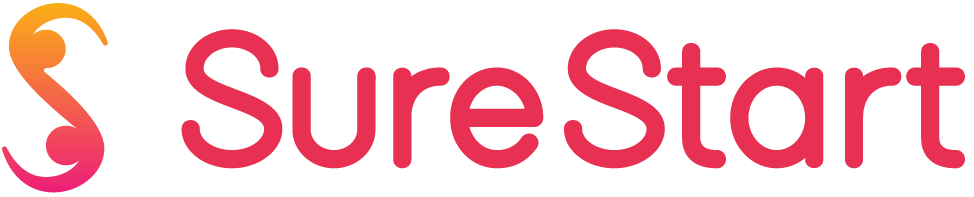

# 🚗 Building Your First Data Dashboard: Exploring Car Statistics!

Welcome to an exciting lesson where we'll create our very own interactive dashboard to explore car data! Remember how in our last lesson we learned about displaying text, getting user input, and creating simple charts? In this lesson we're going to use all those skills to build something really cool—a dashboard that helps us understand different cars and their features.

## 🎯 What We'll Build

Imagine you're an analyst for a car dealership trying to help people understand different cars. You need to create a website that shows interesting information about cars, like:
- How fuel efficient they are (miles per gallon).
- How powerful their engines are (horsepower).
- How heavy they are (weight).
- What years they were made.

By the end of this lesson, you'll have created a professional-looking dashboard that shows all this information in an easy-to-understand way!

## 🚀 Getting Started

First, let's make sure we have all our tools ready. Just like in our previous lesson, we need Streamlit and ngrok. Run these commands to install them:

### 📦 Let's Get Our Tools Ready!


In [1]:
import sys

!{sys.executable} -m pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.4 MB/s eta 0:00:00


Now let's tell Python about your ngrok key:

**Save Your Key Using the Secrets Icon**  
   - In the left-hand sidebar of your environment, look for the **secrets icon** (key icon).  
   - Click on it and add a new secret with the key name `NGROK_AUTH_TOKEN`.  
   - Paste your authtoken as the value and save it securely.



In [7]:
from pyngrok import ngrok
from google.colab import userdata

# Update the Secrets section in the left sidebar with the token you copied
ngrok.set_auth_token(userdata.get('NGROK_AUTH_TOKEN'))

Run the following code below to initialize the run_streamlit function:

In [3]:
import os
def run_streamlit():
    # Kill any running Streamlit instances
    !killall ngrok
    os.system("fuser -k 8501/tcp")

    # Run the Streamlit app
    os.system("streamlit run app.py &>/dev/null&")

    # Create a new ngrok tunnel
    public_url = ngrok.connect(8501)
    print(f"🌟 Your Streamlit app is running at: {public_url.public_url}")
    return public_url.public_url

## 📊 Understanding Our Data

We'll be working with a dataset about cars that includes information like:
- Miles per gallon (MPG): How far the car can drive using one gallon of fuel.
- Horsepower: How powerful the engine is.
- Weight: How heavy the car is.
- Model year: When the car was made.
- Origin: Where the car was made.

## 📝 Task 1: Creating a Starting Page
We'll begin by creating a simple home page.

### Instructions

1. Start by importing the necessary library:
   ```python
   import streamlit as st
   ```

2. Configure your page layout:
   - Use `st.set_page_config()` to set up the basic page structure.
   - The `layout="wide"` parameter ensures your dashboard uses the full screen width.
   - The `page_title` parameter sets what appears in the browser tab.

3. Add a main title to your dashboard:
   - Use `st.title()` to create a prominent heading.
   - Include an emoji (🚗) to make it visually engaging.
   - Remember that this will be the first thing users see.

4. Add a welcome message:
   - Use `st.write()` to add descriptive text below your title.
   - Make the message clear and informative.

### Starter Code

In [4]:
%%writefile app.py
import streamlit as st

# TODO: Add page configuration here
# Hint: Use st.set_page_config() with appropriate parameters
### BEGIN SOLUTION
st.set_page_config(
    page_title="My Car Dashboard",
    layout="wide"
)
### END SOLUTION

# TODO: Add your dashboard title here
# Hint: Use st.title() with a car emoji
### BEGIN SOLUTION
st.title("🚗 Welcome to My Car Dashboard!")
### END SOLUTION

# TODO: Add your welcome message here
# Hint: Use st.write() to introduce your dashboard
### BEGIN SOLUTION
st.write("Hello! This dashboard will help you learn about different cars.")
### END SOLUTION

Writing app.py


In [14]:
import os
# Un-comment this line and execute the cell to run the app
# run_streamlit()

## 📊 Task 2: Loading and Displaying Car Data

On our page, we'll now load car data from the CSV file and display it in a table format.

### Instructions

1. Add pandas to your imports.
2. Create a function called `get_car_data()` that loads the car dataset.
3. Display the total number of cars and show a preview of the data.

In [9]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Copy over your previous page configuration and title from Task 1
### BEGIN SOLUTION
st.set_page_config(
    page_title="My Car Dashboard",
    layout="wide"
)

# Add a big title
st.title("🚗 Welcome to My Car Dashboard!")

# Write a friendly message
st.write("Hello! This dashboard will help you learn about different cars.")
### END SOLUTION

# TODO: Create a function to load the car data
# Hint: Use @st.cache_data and pandas read_csv()
@st.cache_data
def get_car_data():
    url = "https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv"
    ### BEGIN SOLUTION
    cars = pd.read_csv(url)
    return cars
    ### END SOLUTION

# TODO: Load the data using your function
### BEGIN SOLUTION
cars = get_car_data()
### END SOLUTION

# TODO: Display the number of cars
# Hint: Use len(cars) with st.write()
### BEGIN SOLUTION
st.write(f"We have information about {len(cars)} different cars!")
### END SOLUTION

# TODO: Show a preview of the data
# Hint: Use st.dataframe() with cars.head()
### BEGIN SOLUTION
st.write("Here are some of the cars in our list:")
st.dataframe(cars.head())
### END SOLUTION

Overwriting app.py


In [13]:
# Un-comment this line and execute the cell to run the app
# run_streamlit()

## 📊 Task 3: Adding Car Statistics Using Metrics

### What We're Building
We'll display three important car statistics in a clean, organized layout:
- Average miles per gallon (MPG)
- Average horsepower
- Average weight

### Instructions

1. First, we'll create three equal columns using `st.columns(3)`.
2. Calculate the average values using Pandas.
3. Display each metric in its own column using `st.metric()`.

In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd

# Copy over the Previous code. It remains the same...
### BEGIN SOLUTION
# Make our page look nice and wide
st.set_page_config(
    page_title="My Car Dashboard",
    layout="wide"
)

# Add a big title
st.title("🚗 Welcome to My Car Dashboard!")

# Write a friendly message
st.write("Hello! This dashboard will help you learn about different cars.")

# Get our car data
@st.cache_data
def get_car_data():
    url = "https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv"
    cars = pd.read_csv(url)
    return cars

# Load the data
cars = get_car_data()

# Show how many cars we have
st.write(f"We have information about {len(cars)} different cars!")

# Show the first 5 cars in our list
st.write("Here are some of the cars in our list:")
st.dataframe(cars.head())
### END SOLUTION

# TODO: Create three columns
# Hint: Use st.columns(3) to split the page
### BEGIN SOLUTION
col1, col2, col3 = st.columns(3)
### END SOLUTION

# TODO: Calculate averages
# TODO: Display metrics in columns
# Hint: Use cars['column_name'].mean() and round()
# Hint: Use st.metric() inside 'with' statements
### BEGIN SOLUTION
# Calculate some simple facts about our cars
with col1:
    average_mpg = round(cars['mpg'].mean(), 1)
    st.metric("Average Miles per Gallon", f"{average_mpg} MPG")

with col2:
    average_hp = round(cars['horsepower'].mean(), 1)
    st.metric("Average Horsepower", f"{average_hp} HP")

with col3:
    average_weight = round(cars['weight'].mean(), 1)
    st.metric("Average Weight", f"{average_weight} lbs")
### END SOLUTION

Overwriting app.py


In [17]:
# Un-comment this line and execute the cell to run the app
# run_streamlit()

## 📈 Task 4: Creating Your First Data Visualization

### What We're Building
We'll create a bar chart to visualize the fuel efficiency (MPG) of different cars in our dataset.

### Instructions

1. Add a subheader for our visualization section.
2. Create a bar chart showing miles per gallon (MPG) data.
3. The chart should display all cars' MPG values for comparison.

In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Previous code remains the same...
### BEGIN SOLUTION
# Make our page look nice and wide
st.set_page_config(
    page_title="My Car Dashboard",
    layout="wide"
)

# Add a big title
st.title("🚗 Welcome to My Car Dashboard!")

# Write a friendly message
st.write("Hello! This dashboard will help you learn about different cars.")

# Get our car data
@st.cache_data
def get_car_data():
    url = "https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv"
    cars = pd.read_csv(url)
    return cars

# Load the data
cars = get_car_data()

# Show how many cars we have
st.write(f"We have information about {len(cars)} different cars!")

# Show the first 5 cars in our list
st.write("Here are some of the cars in our list:")
st.dataframe(cars.head())

col1, col2, col3 = st.columns(3)

# Calculate some simple facts about our cars
with col1:
    average_mpg = round(cars['mpg'].mean(), 1)
    st.metric("Average Miles per Gallon", f"{average_mpg} MPG")

with col2:
    average_hp = round(cars['horsepower'].mean(), 1)
    st.metric("Average Horsepower", f"{average_hp} HP")

with col3:
    average_weight = round(cars['weight'].mean(), 1)
    st.metric("Average Weight", f"{average_weight} lbs")
### END SOLUTION

# TODO: Add a subheader for the visualization
# Hint: Use st.subheader()
### BEGIN SOLUTION
st.subheader("Car Fuel Efficiency Distribution")
### END SOLUTION

# TODO: Sort the cars by MPG
### BEGIN SOLUTION
sorted_cars = cars.sort_values('mpg', ascending=True).reset_index()
### END SOLUTION

# TODO: Create a bar chart showing MPG data
### BEGIN SOLUTION
fig = px.bar(sorted_cars, y='mpg',
             labels={'mpg': 'Miles per Gallon', 'index': 'Car Rank'},
             title='Distribution of Fuel Efficiency Across All Cars')

# Update layout to better show the distribution
fig.update_layout(
    showlegend=False,
    xaxis_title="Cars (Ranked by MPG)",
    yaxis_title="Miles per Gallon (MPG)",
)
### END SOLUTION

# Display the Plotly chart in Streamlit
### BEGIN SOLUTION
st.plotly_chart(fig, use_container_width=True)
### END SOLUTION

Overwriting app.py


In [21]:
# Un-comment this line and execute the cell to run the app
# run_streamlit()

##🎮 Task 5: Adding Interactive Controls

### What You'll Add
We'll place interactive controls at the top of the dashboard:



> A year slider to filter cars


### Instructions

1. Add a new section **right after your title**.
2. Add a year slider that filters cars based on the selected year.
3. Display the filtered results below the slider.
4. All the information should change depending on the year selected.

In [22]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Previous code remains the same...
### BEGIN SOLUTION
# Make our page look nice and wide
st.set_page_config(
    page_title="My Car Dashboard",
    layout="wide"
)

# Add a big title
st.title("🚗 Welcome to My Car Dashboard!")

# Write a friendly message
st.write("Hello! This dashboard will help you learn about different cars.")

# Get our car data
@st.cache_data
def get_car_data():
    url = "https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv"
    cars = pd.read_csv(url)
    return cars

# Load the data
cars = get_car_data()

# Show how many total cars we have in the dataset
st.write(f"Our database contains information about {len(cars)} different cars!")

# Add a slider to filter cars by year
year = st.slider("Select a Year",
                 min_value=int(cars['model-year'].min()),
                 max_value=int(cars['model-year'].max()))

# Filter cars for the selected year
year_cars = cars[cars['model-year'] == year]

# Show how many cars we have for the selected year
st.write(f"Showing data for {len(year_cars)} cars from {year}:")

# Show the first 5 cars from the selected year
st.write("Here are some of the cars from this year:")
st.dataframe(year_cars.head())

col1, col2, col3 = st.columns(3)

# Calculate metrics for the selected year
with col1:
    average_mpg = round(year_cars['mpg'].mean(), 1)
    st.metric("Average Miles per Gallon", f"{average_mpg} MPG")

with col2:
    average_hp = round(year_cars['horsepower'].mean(), 1)
    st.metric("Average Horsepower", f"{average_hp} HP")

with col3:
    average_weight = round(year_cars['weight'].mean(), 1)
    st.metric("Average Weight", f"{average_weight} lbs")

st.subheader(f"Car Fuel Efficiency Distribution ({year})")

# Create a sorted version of the MPG data for the selected year
sorted_year_cars = year_cars.sort_values('mpg', ascending=True).reset_index()

# Create a bar chart with sorted MPG values
fig = px.bar(sorted_year_cars, y='mpg',
             labels={'mpg': 'Miles per Gallon', 'index': 'Car Rank'},
             title=f'Distribution of Fuel Efficiency Across {year} Cars')

# Update layout to better show the distribution
fig.update_layout(
    showlegend=False,
    xaxis_title="Cars (Ranked by MPG)",
    yaxis_title="Miles per Gallon (MPG)",
)

# Display the Plotly chart in Streamlit
st.plotly_chart(fig, use_container_width=True)
### END SOLUTION
# TODO: Create a year slider
# Hint: Use st.slider() with model-year min and max values
### BEGIN SOLUTION
year = st.slider("Select a Year",
                 min_value=int(cars['model-year'].min()),
                 max_value=int(cars['model-year'].max()))
### END SOLUTION
# TODO: Filter and display cars based on selected year
# Hint: Use cars[cars['model-year'] == selected_year]
### BEGIN SOLUTION
year_cars = cars[cars['model-year'] == year]
### END SOLUTION

Overwriting app.py


In [25]:
# Un-comment this line and execute the cell to run the app
# run_streamlit()